In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import sys
sys.path.append('/home/563/rl5183/PhD-research/Functions')
import functions as func
import matplotlib.pyplot as plt

In [2]:
EP_regressions = xr.open_dataarray('/g/data/w40/rl5183/CMIP6_20_EP_temp_regressions')
CP_regressions = xr.open_dataarray('/g/data/w40/rl5183/CMIP6_20_CP_temp_regressions')
E_regressions = xr.open_dataarray('/g/data/w40/rl5183/CMIP6_20_E_temp_regressions')
C_regressions = xr.open_dataarray('/g/data/w40/rl5183/CMIP6_20_C_temp_regressions')

In [3]:
EP_regressions.model

<xarray.DataArray 'model' (model: 20)>
array(['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CanESM5', 'EC-Earth3',
       'EC-Earth3-Veg', 'FGOALS-g3', 'GFDL-CM4', 'GFDL-ESM4', 'INM-CM4-8',
       'INM-CM5-0', 'KACE-1-0-G', 'KIOST-ESM', 'MIROC6', 'MPI-ESM1-2-HR',
       'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM'],
      dtype=object)
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorESM2-MM'

In [7]:
E_regressions_new = []
for m in E_regressions.model:
    if E_regressions.sel(model=m).sel(lat=-0.75).sel(lon=222) < 0:
        E_regressions_new.append(E_regressions.sel(model=m)*-1)
    else: E_regressions_new.append(E_regressions.sel(model=m))
E_regressions_new = xr.concat(E_regressions_new, dim='model')

In [8]:
C_regressions_new = []
for m in C_regressions.model:
    if C_regressions.sel(model=m).sel(lat=-0.75).sel(lon=222) < 0:
        C_regressions_new.append(C_regressions.sel(model=m)*-1)
    else: C_regressions_new.append(C_regressions.sel(model=m))
C_regressions_new = xr.concat(C_regressions_new, dim='model')

In [9]:
EP_temp_list = []
for m in EP_regressions.model:
    EP_temp_list.append(func.pattern_cor(EP_regressions.sel(model=m), E_regressions_new.sel(model=m)))

In [14]:
CP_temp_list = []
for m in CP_regressions.model:
    CP_temp_list.append(func.pattern_cor(CP_regressions.sel(model=m), C_regressions_new.sel(model=m)))

In [43]:
EP_temp_list

[0.6573136167122731,
 0.940194925327003,
 0.28579490945846553,
 0.9130775690232492,
 0.8658735993258748,
 0.9306294519435171,
 0.9849636299599196,
 0.8692939025516263,
 0.9038666600399641,
 0.5702031157568704,
 0.46598025370009327,
 0.829099907909679,
 0.9167297490376776,
 0.9121453156858638,
 0.9601627999324499,
 0.9212112310055085,
 0.623059769455371,
 0.8354859996618045,
 0.9854266691692972,
 0.823611455650386]

In [21]:
# Investigate EP for BCC-CSM2-MR and CP for ACCESS-CM2 by region

In [22]:
def group_by_lat(data, regions):
    data_by_lat = []
    for reg_name,reg_loc in regions.items():
        data_sliced = data.sel(lat=reg_loc).rename(reg_name)
        data_by_lat.append(data_sliced)
    data_by_lat = xr.merge(data_by_lat)
    return data_by_lat

In [23]:
# Define the regions
regions = {
    "Tropics":slice(-23.5,23.5),
    "Subtropics_NH":slice(23.5,35.5),
    "Subtropics_SH":slice(-35.5, -23.5),
    "Mid_latitudes_NH":slice(35.5, 66.5),
    "Mid_latitudes_SH":slice(-66.5, -35.5),
}

In [24]:
BCC_grouped_EP = group_by_lat(EP_regressions.isel(model=2), regions)
BCC_grouped_E = group_by_lat(E_regressions_new.isel(model=2), regions)

In [28]:
tropics_cor = func.pattern_cor(BCC_grouped_EP.Tropics, BCC_grouped_E.Tropics)
sub_trop_NH_cor = func.pattern_cor(BCC_grouped_EP.Subtropics_NH, BCC_grouped_E.Subtropics_NH)
sub_trop_SH_cor = func.pattern_cor(BCC_grouped_EP.Subtropics_SH, BCC_grouped_E.Subtropics_SH)
mid_lat_NH_cor = func.pattern_cor(BCC_grouped_EP.Mid_latitudes_NH, BCC_grouped_E.Mid_latitudes_NH)
mid_lat_SH_cor = func.pattern_cor(BCC_grouped_EP.Mid_latitudes_SH, BCC_grouped_E.Mid_latitudes_SH)

In [32]:
print(tropics_cor)
print(sub_trop_NH_cor)
print(sub_trop_SH_cor)
print(mid_lat_NH_cor)
print(mid_lat_SH_cor)
print('Sub tropics not great but mid lats the issue')

0.840249067101317
0.5409041284445492
0.5021912723334994
0.12177992541524141
0.24342141360682581
Sub tropics not great but mid lats the issue


In [33]:
ACCESS_grouped_CP = group_by_lat(CP_regressions.isel(model=0), regions)
ACCESS_grouped_C = group_by_lat(C_regressions_new.isel(model=0), regions)

In [34]:
tropics_cor = func.pattern_cor(ACCESS_grouped_CP.Tropics, ACCESS_grouped_C.Tropics)
sub_trop_NH_cor = func.pattern_cor(ACCESS_grouped_CP.Subtropics_NH, ACCESS_grouped_C.Subtropics_NH)
sub_trop_SH_cor = func.pattern_cor(ACCESS_grouped_CP.Subtropics_SH, ACCESS_grouped_C.Subtropics_SH)
mid_lat_NH_cor = func.pattern_cor(ACCESS_grouped_CP.Mid_latitudes_NH, ACCESS_grouped_C.Mid_latitudes_NH)
mid_lat_SH_cor = func.pattern_cor(ACCESS_grouped_CP.Mid_latitudes_SH, ACCESS_grouped_C.Mid_latitudes_SH)

In [38]:
print(tropics_cor)
print(sub_trop_NH_cor)
print(sub_trop_SH_cor)
print(mid_lat_NH_cor)
print(mid_lat_SH_cor)
print('Dont know what the issue is here and why the overall correlation is so low. Needs further investigation')

0.835500956645177
0.8050988729799731
0.865708437182591
0.6019304296139593
0.8329189486230395
Dont know what the issue is here and why the overall correlation is so low. Needs further investigation


In [42]:
# Make pandas dataframe 
model_names = E_regressions.model.values
names = list(model_names)

pandas_data = []
for i in np.arange(0,len(names)):
    cell = [names[i], EP_temp_list[i], CP_temp_list[i]]
    pandas_data.append(cell)
    
temp_df = pd.DataFrame(pandas_data, columns=['Model', 'EP', 'CP'])
temp_df.head()

,Model,EP,CP
0,ACCESS-CM2,0.657314,0.426122
1,ACCESS-ESM1-5,0.940195,0.958247
2,BCC-CSM2-MR,0.285795,0.973042
3,CanESM5,0.913078,0.983263
4,EC-Earth3,0.865874,0.908713


Text(0.5, 1.0, 'TEMP NINO vs EOF')

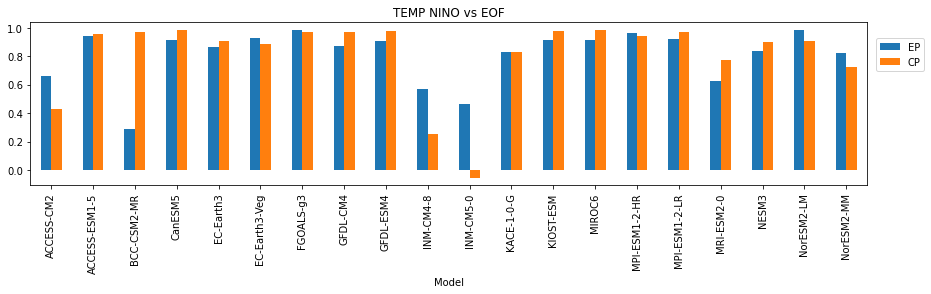

In [46]:
temp_df.plot(x='Model', kind='bar', stacked=False, figsize=(15,3))
plt.legend(loc=(1.01,0.7))
plt.title('TEMP NINO vs EOF')

Text(0.5, 1.0, 'TEMP NINO vs EOF')

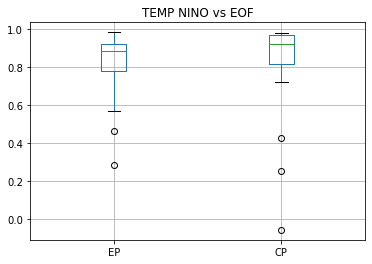

In [48]:
temp_df.boxplot(column=['EP', 'CP'])
plt.title('TEMP NINO vs EOF')

In [50]:
EP_regressions = xr.open_dataarray('/g/data/w40/rl5183/CMIP6_20_EP_pr_regressions')
CP_regressions = xr.open_dataarray('/g/data/w40/rl5183/CMIP6_20_CP_pr_regressions')
E_regressions = xr.open_dataarray('/g/data/w40/rl5183/CMIP6_20_E_pr_regressions')
C_regressions = xr.open_dataarray('/g/data/w40/rl5183/CMIP6_20_C_pr_regressions')

In [51]:
E_regressions_new = []
for m in E_regressions.model:
    if m == 'ACCESS-CM2' or m == 'BCC-CSM2-MR' or m == 'GFDL-ESM4' or m == 'INM-CM4-8' or m == 'INM-CM5-0' or m == 'KACE-1-0-G' or m == 'MIROC6' or m == 'MPI-ESM1-2-HR' or m == 'MRI-ESM2-0' or m == 'NorESM2-LM' or m == 'NorESM2-MM':
        E_regressions_new.append(E_regressions.sel(model=m)*-1)
    else: E_regressions_new.append(E_regressions.sel(model=m))
E_regressions_new = xr.concat(E_regressions_new, dim='model')

In [52]:
C_regressions_new = []
for m in C_regressions.model:
    if m == 'ACCESS-CM2' or m == 'BCC-CSM2-MR' or m == 'GFDL-ESM4' or m == 'INM-CM4-8' or m == 'INM-CM5-0' or m == 'KACE-1-0-G' or m == 'MIROC6' or m == 'MPI-ESM1-2-HR' or m == 'MRI-ESM2-0' or m == 'NorESM2-LM' or m == 'NorESM2-MM':
        C_regressions_new.append(C_regressions.sel(model=m)*-1)
    else: C_regressions_new.append(C_regressions.sel(model=m))
C_regressions_new = xr.concat(C_regressions_new, dim='model')

In [53]:
EP_pr_list = []
for m in EP_regressions.model:
    EP_pr_list.append(func.pattern_cor(EP_regressions.sel(model=m), E_regressions_new.sel(model=m)))

In [54]:
CP_pr_list = []
for m in CP_regressions.model:
    CP_pr_list.append(func.pattern_cor(CP_regressions.sel(model=m), C_regressions_new.sel(model=m)))

In [56]:
# Make pandas dataframe 
model_names = E_regressions.model.values
names = list(model_names)

pandas_data = []
for i in np.arange(0,len(names)):
    cell = [names[i], EP_pr_list[i], CP_pr_list[i]]
    pandas_data.append(cell)
    
pr_df = pd.DataFrame(pandas_data, columns=['Model', 'EP', 'CP'])
pr_df.head()

,Model,EP,CP
0,ACCESS-CM2,0.896120,0.851526
1,ACCESS-ESM1-5,0.969157,0.989441
2,BCC-CSM2-MR,0.729247,0.985977
3,CanESM5,0.976365,0.989653
4,EC-Earth3,0.982342,0.977989


Text(0.5, 1.0, 'TEMP NINO vs EOF')

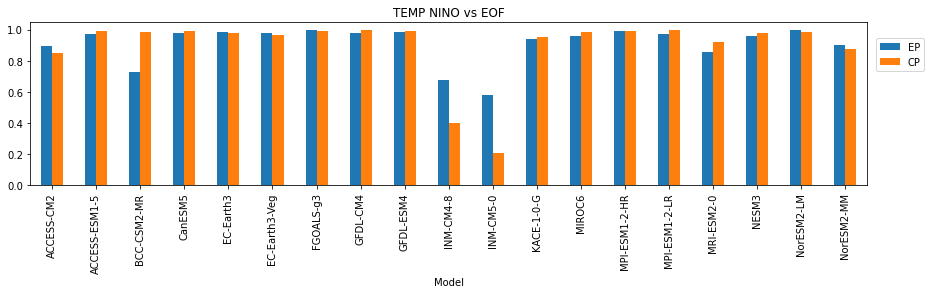

In [57]:
pr_df.plot(x='Model', kind='bar', stacked=False, figsize=(15,3))
plt.legend(loc=(1.01,0.7))
plt.title('PRECIP NINO vs EOF')

Text(0.5, 1.0, 'TEMP NINO vs EOF')

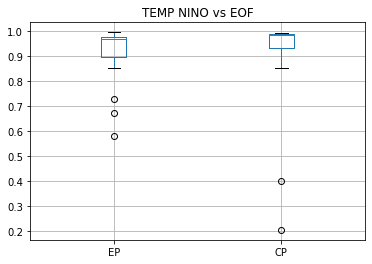

In [59]:
pr_df.boxplot(column=['EP', 'CP'])
plt.title('PRECIP NINO vs EOF')

### Only seems to be issues with models that have poor ENSO e.g., INM x2. Need to look into BCC as that hasn't performed that well across both these tests. Maybe it's a problem with the model rather than the teleconnections? Not sure what is going on with ACCESS temperature??? But generally happy with results. Still seems to be no major differences in spatial patterns of teleconnections based off choice of method. 

#### Can use spatial pattern results as population to do a t-test? Is that even useful? 